En este proyecto se realizara un Análisis Exploratorio de Datos(EDA)para comprender el comportamiento del servicio de taxis en la ciudad de Nueva York.En donde se aplicaran varios procedimientos para poder extraer a partir de los datos utilizados que nos provienen de diversas fuentes, incluyendo registros de viajes de taxis, información de estaciones de carga de combustibles alternativos y datos económicos relacionados con el uso de vehículos.
La finalidad de este análisis es identificar patrones, tendencias y anomalías en los datos, que nos permitan proponer mejoras en la eficiencia del servicio de taxis y la reducción de emisiones de CO2.



Importación de librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import warnings
import geopandas as gps


In [2]:
# Ignorar warnings
warnings.filterwarnings("ignore")

Ingesta y lectura de los archivos con extensión csv y dbf

In [4]:
# Ruta de acceso
taxi_zone_lookup = pd.read_csv(r'C:\Users\walter\Desktop\Proyecto-NYC-Taxis\Data\taxi+_zone_lookup.csv')

# Archivo csv pasado a Dataframe
df = taxi_zone_lookup

# Mostrar las primeras y ultimas filas del DataFrame
print(df.head())
print(df.tail())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone
     LocationID    Borough                Zone service_zone
260         261  Manhattan  World Trade Center  Yellow Zone
261         262  Manhattan      Yorkville East  Yellow Zone
262         263  Manhattan      Yorkville West  Yellow Zone
263         264    Unknown                  NV          NaN
264         265    Unknown                 NaN          NaN


Revisión del df taxi+_zone_lookup

In [5]:
# Descripción general para verificar tipos de datos y datos nulos.
print(df.info)

<bound method DataFrame.info of      LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                       NV          NaN
264         265        Unknown                      NaN          NaN

[265 rows x 4 columns]>


Datos faltantes en total Dataframe

In [6]:
# Contar valores faltantes totales 
total_missing_values = df.isnull().sum().sum()
print("Valores faltantes totales:", total_missing_values)

Valores faltantes totales: 3


Cantidad de datos faltante por columna

In [8]:
missing_values_per_column = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values_per_column)

Valores faltantes por columna:
 LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64


Verificación de matriz de datos faltantes mediante gráfico de barras

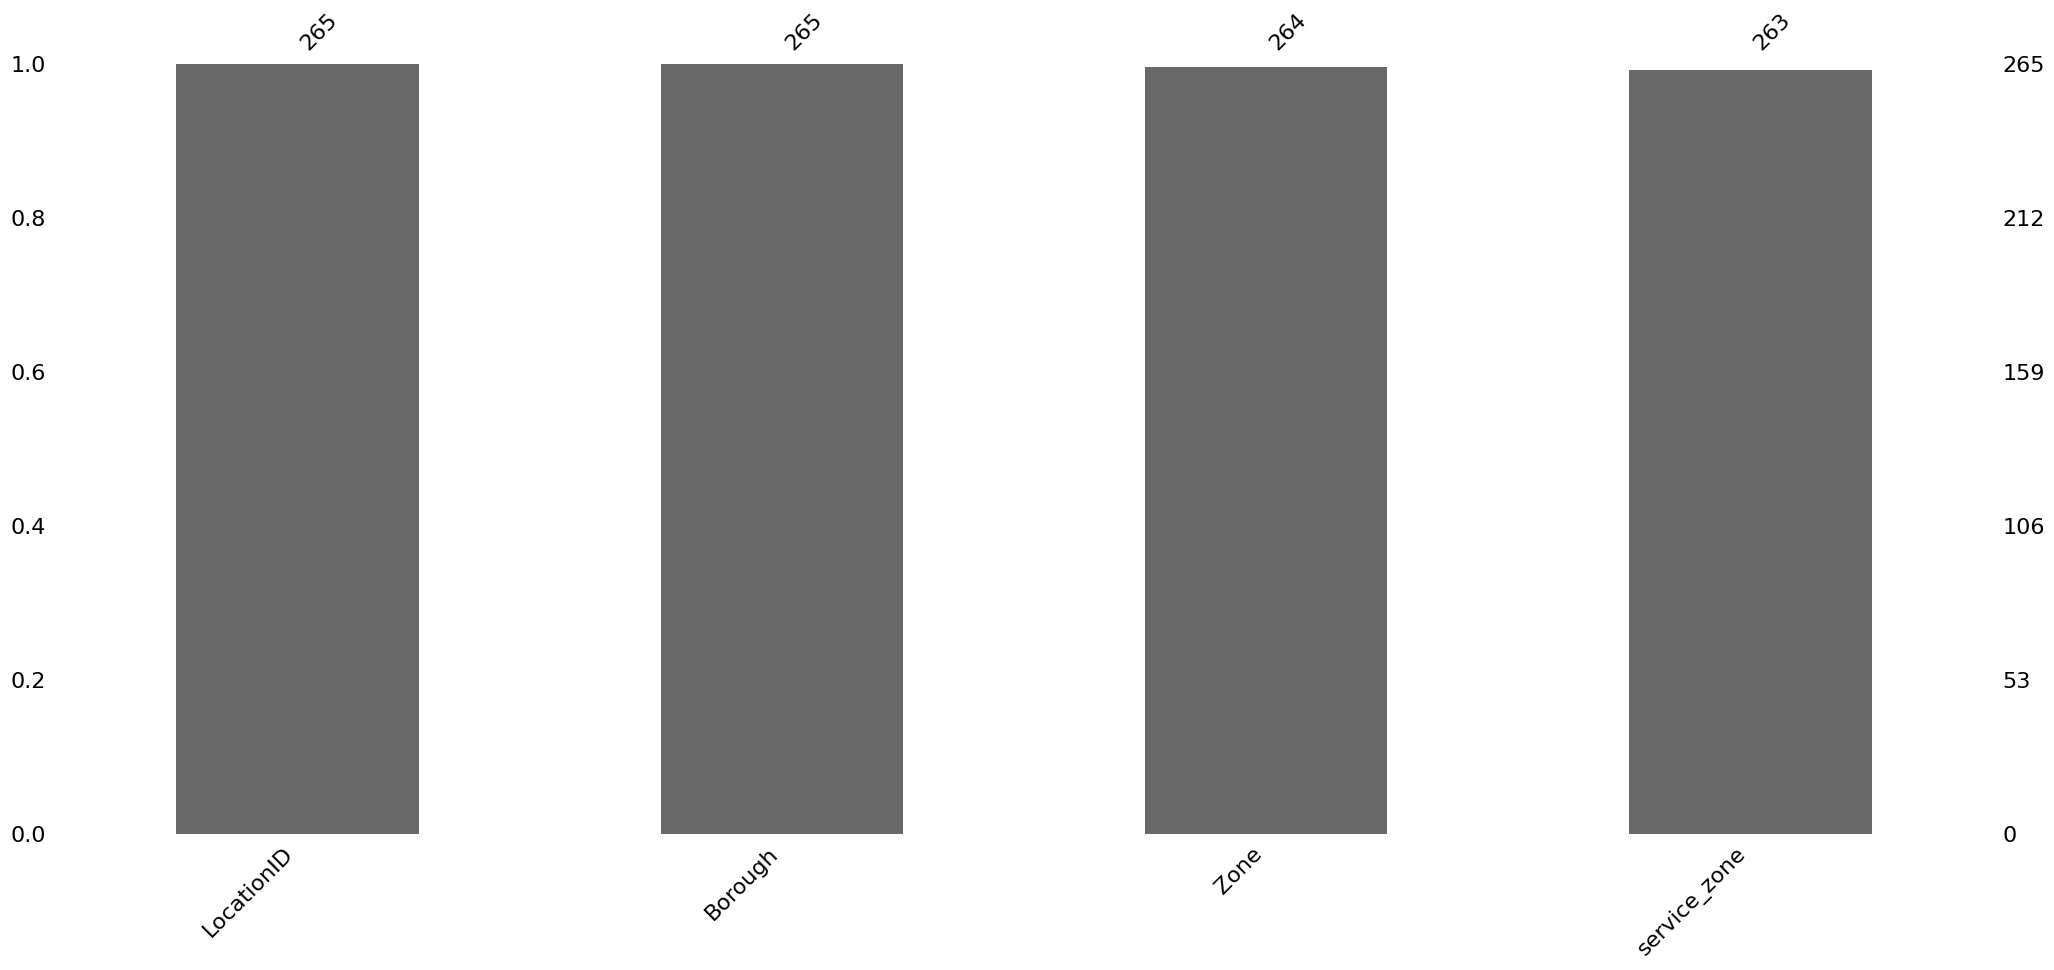

In [7]:
msno.bar(df)
plt.show()

Correlacion de datos faltantes de cada columna

<Axes: >

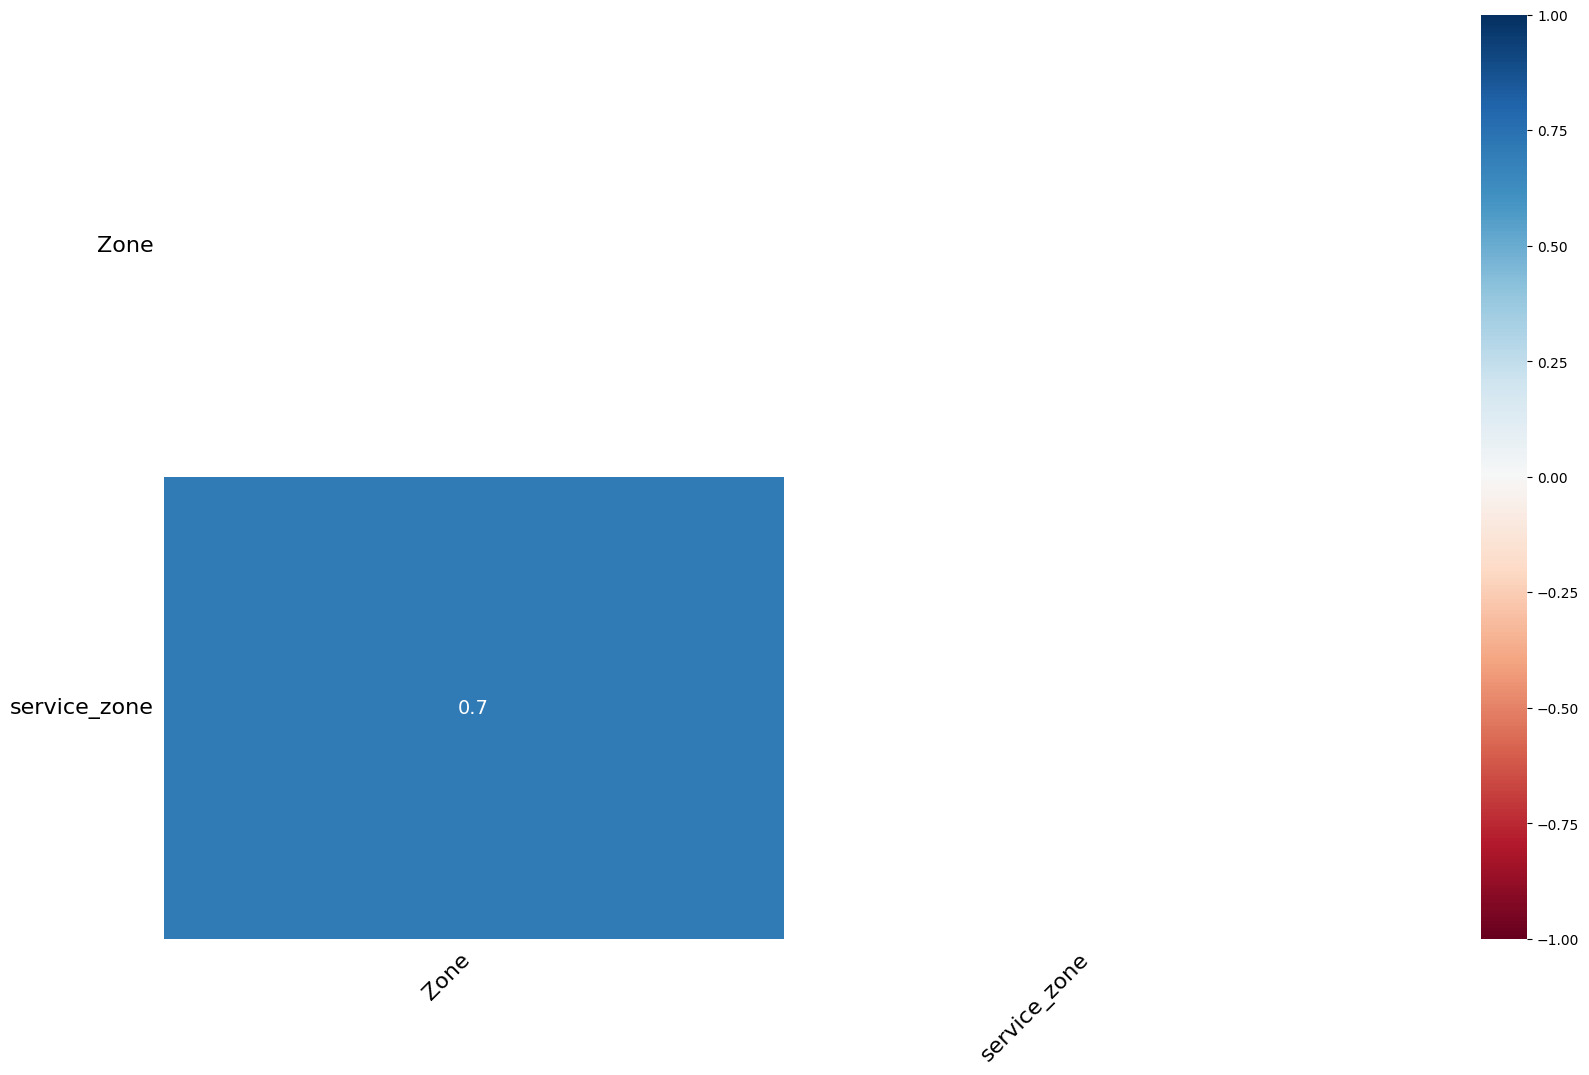

In [8]:
msno.heatmap(df)

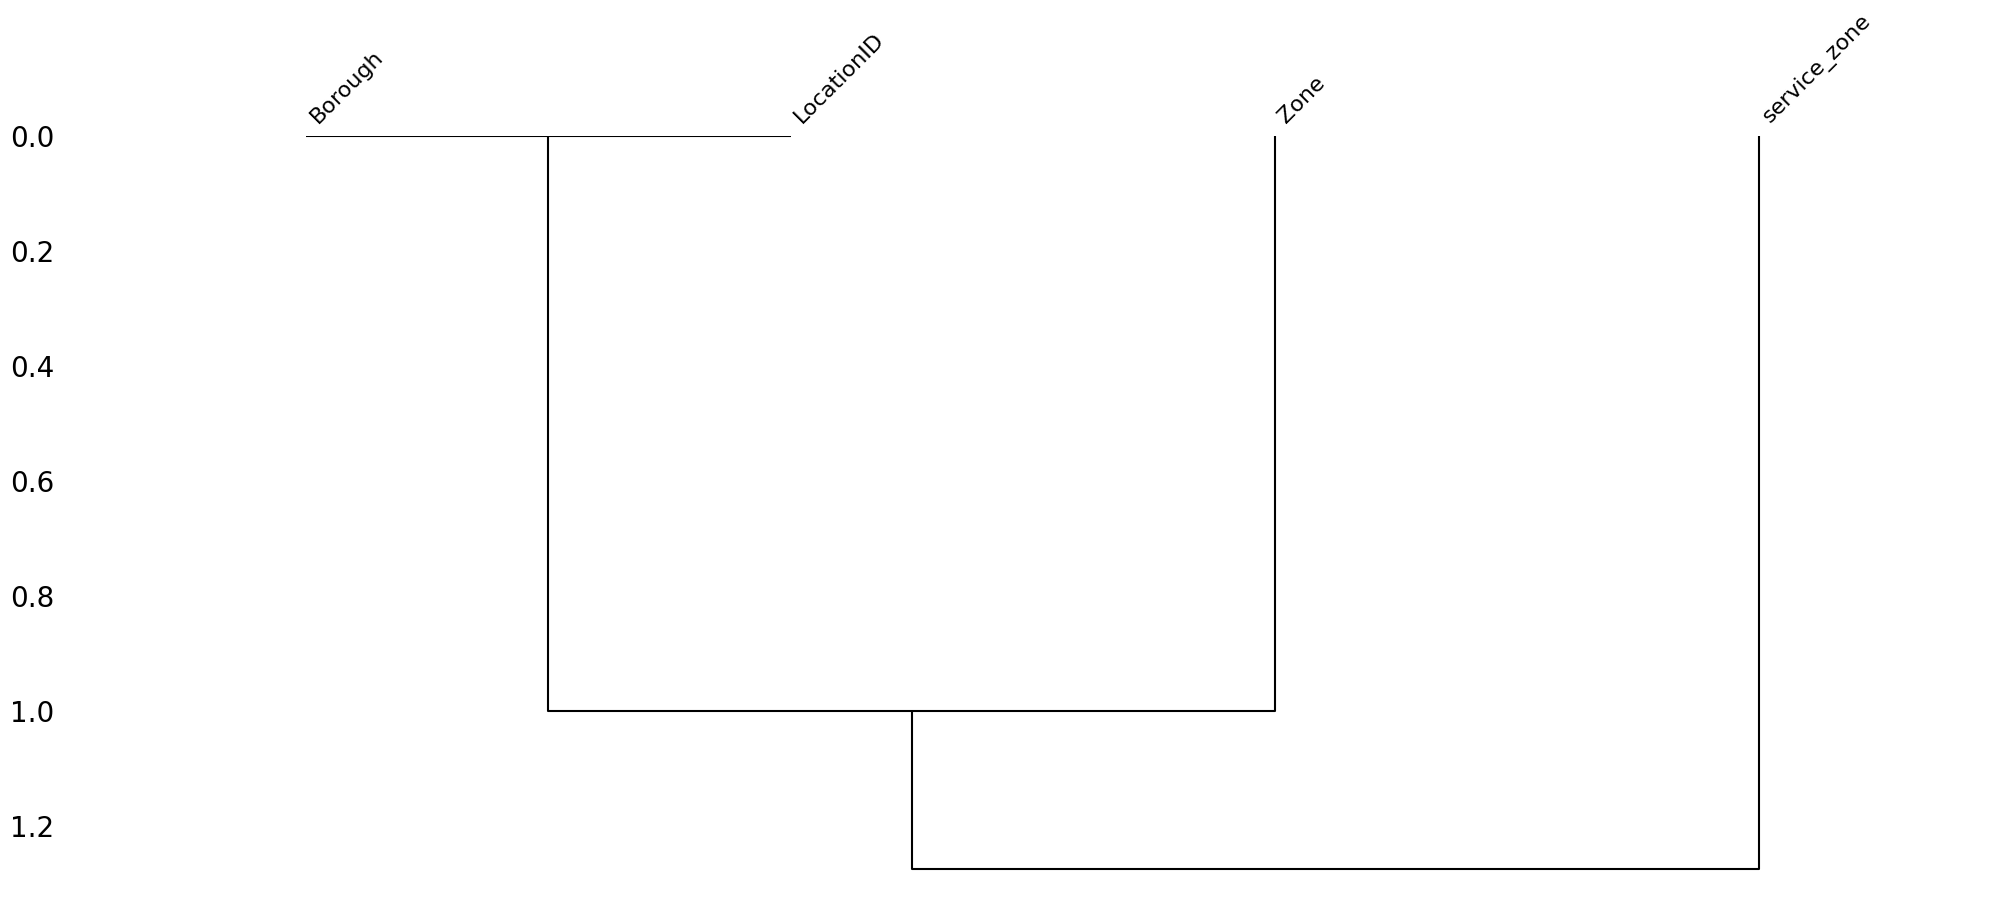

In [9]:
# Visualización de dendrograma de datos faltantes
msno.dendrogram(df)
plt.show()

 Filas con los valores faltantes 

In [10]:
# Contar filas con al menos un valor faltante
rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Filas con al menos un valor faltante:", rows_with_missing_values)

# Ver nombres de las filas con valores faltantes
rows_with_missing_values_indices = df[df.isnull().any(axis=1)].index
print("Nombres de las filas con valores faltantes:", rows_with_missing_values_indices.tolist)

Filas con al menos un valor faltante: 2
Nombres de las filas con valores faltantes: <bound method IndexOpsMixin.tolist of Index([263, 264], dtype='int64')>


Se cuenta las ocurrencias por la columna Borought y service_zone y se se visualiza su distribución por Borought en gráfico de barras.

In [11]:
# Contar las ocurrencias 
borough_service_zone_counts = df.groupby(['Borough', 'service_zone']).size().reset_index(name='counts')
print(borough_service_zone_counts)

         Borough service_zone  counts
0          Bronx    Boro Zone      43
1       Brooklyn    Boro Zone      61
2            EWR          EWR       1
3      Manhattan    Boro Zone      14
4      Manhattan  Yellow Zone      55
5         Queens     Airports       2
6         Queens    Boro Zone      67
7  Staten Island    Boro Zone      20


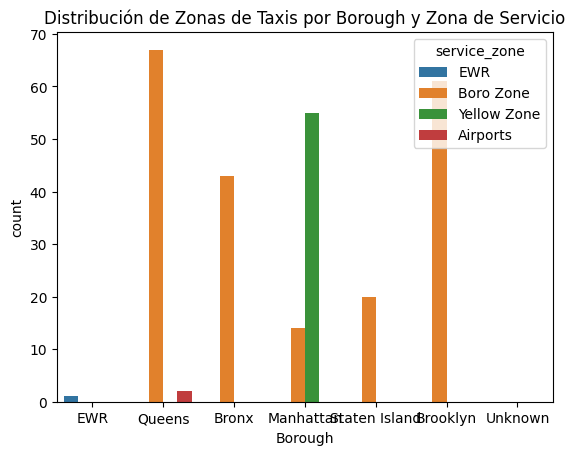

In [12]:
#Visualización
sns.countplot(data=df, x='Borough', hue='service_zone')
plt.title('Distribución de Zonas de Taxis por Borough y Zona de Servicio')
plt.show()

Se cálcula el % total del servicio de taxis utilizados 

In [16]:
# Ocurrencias por distrito (Borough)
borough_counts = df['Borough'].value_counts()

# Total de ocurrencias
total_count = borough_counts.sum()

# Porcentaje de cada distrito
borough_percentage = (borough_counts / total_count) * 100

print(borough_percentage)



Borough
Queens           26.037736
Manhattan        26.037736
Brooklyn         23.018868
Bronx            16.226415
Staten Island     7.547170
Unknown           0.754717
EWR               0.377358
Name: count, dtype: float64


In [17]:
# Resultado
print("Total de frecuencias de taxis solicitados:", total_count)
print("Porcentajes de frecuencias por distrito:")
print(borough_percentage)

Total de frecuencias de taxis solicitados: 265
Porcentajes de frecuencias por distrito:
Borough
Queens           26.037736
Manhattan        26.037736
Brooklyn         23.018868
Bronx            16.226415
Staten Island     7.547170
Unknown           0.754717
EWR               0.377358
Name: count, dtype: float64


Resumen estadístico de la columna ID(numérica)

Visualización en gráfico de barras del % total por distrito.

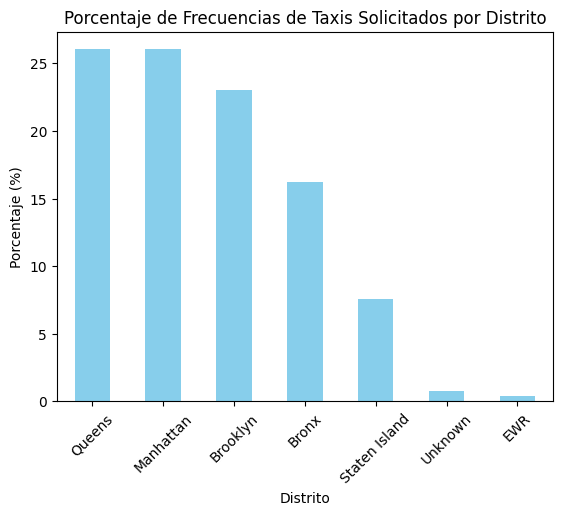

In [18]:
# Resultado
borough_percentage.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Frecuencias de Taxis Solicitados por Distrito')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Distrito')
plt.xticks(rotation=45)
plt.show()

Visualizacion de las columnas categóricas y frecuencia de cada categoria

In [19]:
count_values = df[['Borough', 'Zone', 'service_zone']].value_counts()
print(count_values)

Borough        Zone                                           service_zone
Manhattan      Governor's Island/Ellis Island/Liberty Island  Yellow Zone     3
Queens         Corona                                         Boro Zone       2
Bronx          Allerton/Pelham Gardens                        Boro Zone       1
Manhattan      Yorkville West                                 Yellow Zone     1
Queens         Bay Terrace/Fort Totten                        Boro Zone       1
                                                                             ..
Brooklyn       Prospect Heights                               Boro Zone       1
               Prospect Park                                  Boro Zone       1
               Prospect-Lefferts Gardens                      Boro Zone       1
               Red Hook                                       Boro Zone       1
Staten Island  Westerleigh                                    Boro Zone       1
Name: count, Length: 260, dtype: int64


Inspección de la columna ID(ubicación)de los taxis(variable númerica)

In [20]:
#Resumen estadístico
df.describe()

,LocationID
count,265.000000
mean,133.000000
std,76.643112
min,1.000000
25%,67.000000
50%,133.000000
75%,199.000000
max,265.000000


Se inspecciona la distribución

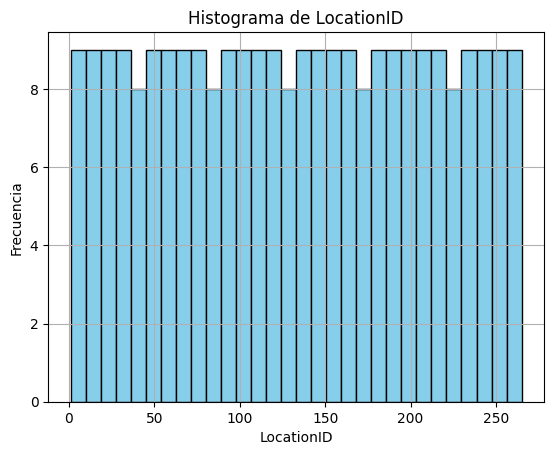

In [26]:
#Visualización de frecuencia.
df['LocationID'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de LocationID')
plt.xlabel('LocationID')
plt.ylabel('Frecuencia')
plt.show()

Identificación de presencia de outliers mediante diagrama de boxplots

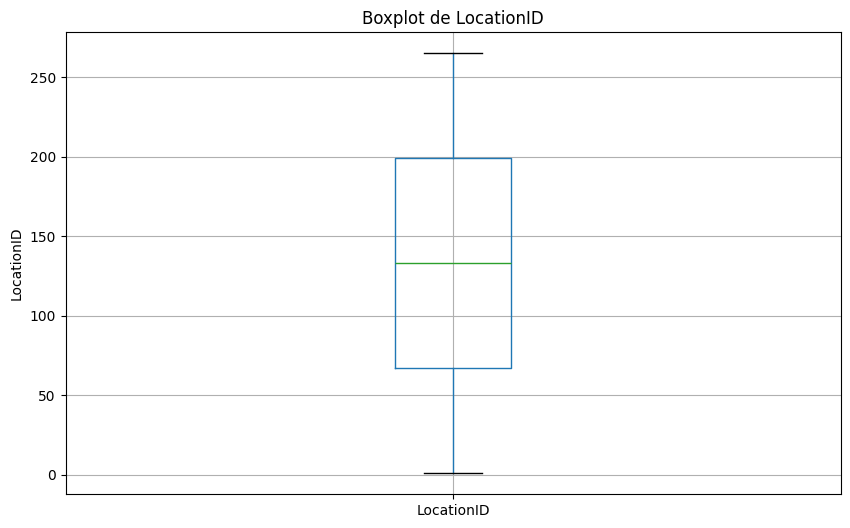

In [27]:
#Resultado
plt.figure(figsize=(10, 6))
df.boxplot(column='LocationID')
plt.title('Boxplot de LocationID')
plt.ylabel('LocationID')
plt.show()


Se da confirmando que no hay existencias de outliers con el metodo intercuartílico

In [28]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['LocationID'].quantile(0.25)
Q3 = df['LocationID'].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers
outliers = df[(df['LocationID'] < (Q1 - 1.5 * IQR)) | (df['LocationID'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [LocationID, Borough, Zone, service_zone]
Index: []


Se realiza la relación entre las variables  categóricas Zone y service_zone

Zone
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Ocean Hill                                       1
Parkchester                                      1
                                                ..
Fordham South                                    1
Forest Hills                                     1
Forest Park/Highland Park                        1
Fort Greene                                      1
NV                                               1
Name: count, Length: 261, dtype: int64


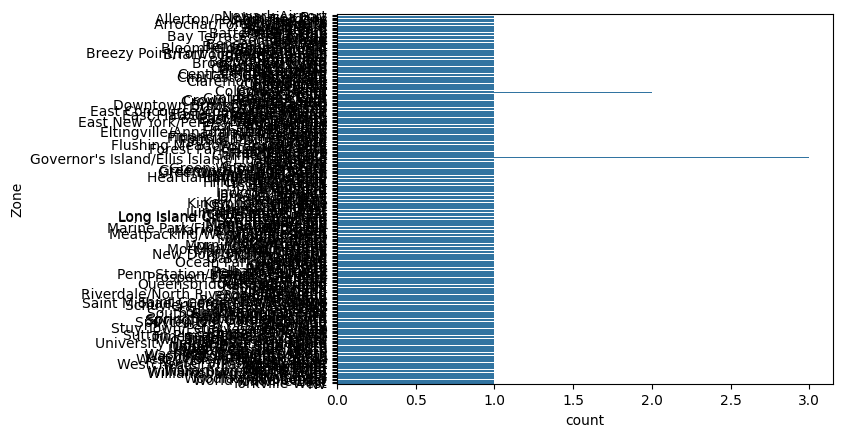

service_zone
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64


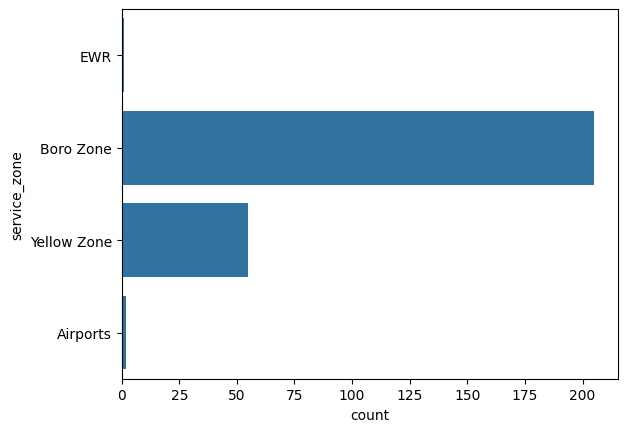

In [31]:
# Visualización 
for columna in ['Zone', 'service_zone']:
    if columna in df.columns:
        print(df[columna].value_counts())
        sns.countplot(y=columna, data=df)
        plt.show()

Búsqueda de duplicados

In [32]:
# Encontrar filas duplicadas
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [LocationID, Borough, Zone, service_zone]
Index: []


Se indica la cantidad de filas y columnas analizadas.

In [33]:
# Número total de filas y columnas
total_rows, total_columns = df.shape
print(f"Total de filas: {total_rows}")
print(f"Total de columnas: {total_columns}")

Total de filas: 265
Total de columnas: 4


In [34]:
# Número de filas con datos (filas que no están completamente vacías)
non_empty_rows = df.dropna(how='all').shape[0]
print(f"Número de filas con datos: {non_empty_rows}")


Número de filas con datos: 265


Conclusión:
Se deja detallado que se procedio al Análisis Exploratorio de Datos con diferentes técnicas utilizadas a un dataset de 4 columnas con un numero toltal de filas de 265,en donde se encuentran con valores existentes de los cuales solo 3 se consideran como datos descartables(nulos).
Por lo tanto se deja asentado que las 262 datos restantes son de gran aporte y valor al objetivo planteado.